# SPIN 1 - VL05 -- Gravitation und Leapfrog: Das Sonnensystem

In [24]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
# GMsun = k^2
k = 0.01720209895

#Datum = 18.03.08 00:00:00.0000,    2454543.500000000 = A.D.
day = 2454543.500000000


In [43]:
 class Body:
    def __init__(self, mass, r, v, f):
        self.r = r
        self.v = v
        self.f = f
        self.mass = mass

sonne =  Body( 1.0, 
                [-3.402962055191472E-04, 4.973801475460748E-03,-6.230136454608636E-05], 
                [-6.477668621023070E-06,-1.292580409219799E-07, 1.154585032962209E-07], 
                [0,0,0])
merkur = Body( 1.0/6023600, 
                [3.704735169720974E-02,-4.529211095852149E-01,-4.090255306376755E-02], 
                [2.239183874467135E-02, 3.736008439029809E-03,-1.750026916388115E-03], 
                [0,0,0])
venus = Body( 1.0/408523.61,  
                [4.272157290820016E-01,-5.835752726996720E-01,-3.279422047835795E-02], 
                [1.622328987696207E-02, 1.181629954076840E-02,-7.748242818668279E-04], 
                [0,0,0])
erdemond = Body( 1.0/332946.050895,
                [-9.948486972722731E-01, 4.564231864395614E-02,-6.099525188647536E-05],
                [-9.901408163678924E-04,-1.725450198017297E-02, 4.346241632445323E-07], 
                [0,0,0])
mars = Body( 1.0/3098708,
                [-1.093539305796724E+00, 1.240381444357973E+00, 5.266905384900308E-02],
                [-9.958470942542191E-03,-8.082316351751016E-03, 7.520708651107539E-05], 
                [0,0,0])
jupiter = Body( 1.0/1047.3486,
                [7.199075962861715E-01,-5.164765414047316E+00, 5.281301305052329E-03],
                [7.380707839356994E-03, 1.399344086177555E-03,-1.710023430451413E-04], 
                [0,0,0])
saturn = Body( 1.0/3497.898,
                [-8.469664737705321E+00, 3.804527121928150E+00, 2.708474727487031E-01],
                [-2.583089539225567E-03,-5.101976771205786E-03, 1.915567842416982E-04], 
                [0,0,0])
uranus = Body( 1.0/22902.98,
                [1.970001443062262E+01,-3.956376098536538E+00,-2.699288868040702E-01],
                [7.457402740600397E-04, 3.672797797089092E-03, 3.988780204062304E-06], 
                [0,0,0])
neptun = Body( 1.0/19412.24,
                [2.361441531200179E+01,-1.856288724958460E+01,-1.619425696998957E-01],
                [1.919278314221217E-03, 2.486348363416270E-03,-9.543324154983418E-05], 
                [0,0,0])
pluto = Body( 1.0/135200000,
                [-4.656585770964581E-01,-3.123136435608064E+01, 3.476634650132539E+00],
                [3.195935187090267E-03,-6.368370346118488E-04,-8.563102596919757E-04], 
                [0,0,0])

print(neptun.r[1])
planeten = [sonne, merkur, venus, erdemond, mars, jupiter, saturn, uranus, neptun]
N = len(planeten)
h = 2.0
data = [[[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]], [[],[],[]]]
def update_forces():
    for p in planeten:
        for l in range(0,3):
            p.f[l] = 0.0
    for i in range(0,N-1):
        for j in range(i+1,N):
            d2 = 0.0
            ir = 0.0
            ir3 = 0.0
            
            d = [0,0,0]
            for l in range(0,3):
                d[l] = planeten[j].r[l] - planeten[i].r[l]
                d2 += d[l]**2
            ir = 1.0 / math.sqrt(d2)
            ir3 = ir**3
            ir3 *= planeten[i].mass * planeten[j].mass
            ir3 *= k**2
            for l in range(0,3):
                planeten[i].f[l] += ir3 * d[l]
                planeten[j].f[l] -= ir3 * d[l]

for iteration in range(0,8):
    for p in planeten:
        for k in range(0,3):
            p.r[k] += 0.5 * h * p.v[k]
            
    update_forces()
    
    for p in planeten:
        for k in range(0,3):
            p.v[k] +=  h * (p.f[k] / p.mass)
        print(str(p.f[0]))
  
    for p in range(0,N):
        for k in range(0,3):
            planeten[p].r[k] += 0.5 * h * planeten[p].v[k]
        for k in range(0,3):
            data[p][k].append(planeten[p].r[k])



-18.5628872495846
7.271014919421955e-06
-4.0772689389135026e-07
-1.1239750653839472e-05
1.2113049880963256e-05
3.1638459602224724e-07
-1.9549509371309118e-05
1.2100765767938964e-05
-4.2444146627014256e-07
-1.797867790363375e-07
1.3504327298539096e-05
1.5231014213713743e-11
6.886778591145208e-09
-5.243983774640669e-08
-4.833330762079204e-08
-2.5408443948434578e-05
1.260418644313869e-05
-4.2617083622497113e-07
-1.8002782125639279e-07
3.887318970601151e-05
3.785370494121588e-12
1.6811291972555658e-09
-1.23522568787522e-08
-1.0190611514333937e-08
-5.197007224095285e-05
1.3727816558266837e-05
-4.2959618810603177e-07
-1.8047988139413714e-07
0.00316597778592384
1.679083260797555e-12
7.413817729960738e-10
-5.3862165708941726e-09
-4.406427499565287e-09
-0.0031811476446768844
1.5794889297584806e-05
-4.34830637079181e-07
-1.81150324246238e-07
-1.8835893126012798e-05
9.436342093534216e-13
4.165062252986386e-10
-3.001286056979469e-09
-2.4852672725862415e-09
1.5007468779784548e-07
1.9316570943897503

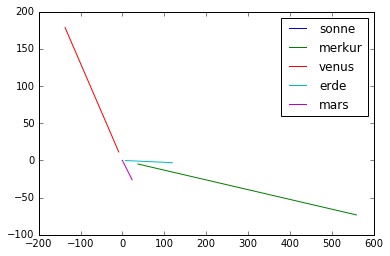

In [41]:
plt.plot(data[0][0], data[0][1], '-', label = 'sonne')
plt.plot(data[1][0], data[1][1], '-', label = 'merkur')
plt.plot(data[2][0], data[2][1], '-', label = 'venus')
plt.plot(data[3][0], data[3][1], '-', label = 'erde')
plt.plot(data[4][0], data[4][1], '-', label = 'mars')

plt.legend(loc='upper right')